# Computational Lab to Solve Schrodinger Equation

# Task 1: Analytical Solution for the Infinite Square Well

## Problem Statement

Solve the non-dimensional Schrödinger equation (2) analytically for the infinite square well where:

- **Potential:** ν(x̃) = −1 for 0 < x̃ < 1
- **Boundary conditions:** ψ(0) = ψ(1) = 0 (infinite walls)

**Find:**
1. Expression for the non-dimensional energy eigenvalues in terms of γ²
2. Normalized wave functions (in non-dimensional units)

---

## Solution

# Task 1: Analytical Solution for the Infinite Square Well

## Given Information

- Non-dimensional Schrödinger equation: $\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - \nu(\tilde{x}))\psi = 0$
- Potential: $\nu(\tilde{x}) = -1$ for $0 < \tilde{x} < 1$
- Boundary conditions: $\psi(0) = 0$ and $\psi(1) = 0$ (infinite walls)

---

## Derivation

### Step 1: Substitute the potential

With $\nu(\tilde{x}) = -1$, the equation becomes:

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon - (-1))\psi = 0$$

$$\frac{d^2\psi}{d\tilde{x}^2} + \gamma^2(\epsilon + 1)\psi = 0$$

### Step 2: Define $k^2 = \gamma^2(\epsilon + 1)$

The equation simplifies to:

$$\frac{d^2\psi}{d\tilde{x}^2} + k^2\psi = 0$$

This is a simple harmonic oscillator equation with general solution:

$$\psi(\tilde{x}) = A \sin(k\tilde{x}) + B \cos(k\tilde{x})$$

### Step 3: Apply boundary conditions

**Left boundary ($\tilde{x} = 0$):**

$$\psi(0) = A \sin(0) + B \cos(0) = B = 0$$

So $B = 0$, giving us: $\psi(\tilde{x}) = A \sin(k\tilde{x})$

**Right boundary ($\tilde{x} = 1$):**

$$\psi(1) = A \sin(k) = 0$$

For non-trivial solutions ($A \neq 0$), we need: $\sin(k) = 0$

This gives us: **$k = n\pi$**, where $n = 1, 2, 3, \ldots$

### Step 4: Find energy eigenvalues

From $k^2 = \gamma^2(\epsilon + 1)$ and $k = n\pi$:

$$(n\pi)^2 = \gamma^2(\epsilon + 1)$$

$$n^2\pi^2 = \gamma^2(\epsilon + 1)$$

$$\epsilon + 1 = \frac{n^2\pi^2}{\gamma^2}$$

$$\boxed{\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots}$$

### Step 5: Normalize the wave functions

The unnormalized wave function is: $\psi_n(\tilde{x}) = A \sin(n\pi\tilde{x})$

Normalization condition:

$$\int_0^1 |\psi_n(\tilde{x})|^2 d\tilde{x} = 1$$

$$\int_0^1 A^2 \sin^2(n\pi\tilde{x}) d\tilde{x} = 1$$

Using the integral: $\int_0^1 \sin^2(n\pi\tilde{x}) d\tilde{x} = \frac{1}{2}$

$$A^2 \cdot \frac{1}{2} = 1$$

$$A^2 = 2$$

$$A = \sqrt{2}$$

$$\boxed{\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad n = 1, 2, 3, \ldots}$$

---

## Final Results

### Energy Eigenvalues

$$\epsilon_n = \frac{n^2\pi^2}{\gamma^2} - 1, \quad n = 1, 2, 3, \ldots$$

### Normalized Wave Functions

$$\psi_n(\tilde{x}) = \sqrt{2} \sin(n\pi\tilde{x}), \quad 0 \leq \tilde{x} \leq 1$$

### First Few States

| $n$ | Energy $\epsilon_n$ | Wave Function |
|-----|---------------------|---------------|
| 1 | $\frac{\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(\pi\tilde{x})$ |
| 2 | $\frac{4\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(2\pi\tilde{x})$ |
| 3 | $\frac{9\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(3\pi\tilde{x})$ |

---



# Task 2: Numerical Solution for the Wave Function

## Objective

Find the wave function $\psi$ numerically in the infinite square well for a given non-dimensional trial energy $\epsilon$. 


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

In [60]:
# Constants
N = 1000  # Number of grid points
gamma_squared = 200  # γ²
l = 1.0 / (N - 1)  # Step size
x = np.linspace(0, 1, N)  # Discretized x values

In [61]:
# Potential: Infinite square well
potential = np.full(N, -1.0)  # ν(x) = -1 for 0 < x < 1

In [62]:
# Function to compute k²
def compute_k_squared(energy, potential, gamma_squared):
    return gamma_squared * (energy - potential)

In [63]:
psi = np.zeros(N)
psi[1] = 1e-4  # Arbitrary small value for initial slope

In [64]:
# Function to solve Schrödinger equation numerically
def solve_schrodinger(energy, potential, gamma_squared, N, l):
    k_squared = compute_k_squared(energy, potential, gamma_squared)

    # Iteratively compute psi using the finite difference method
    for n in range(1, N - 1):
        psi[n + 1] = (
            2 * (1 - (5 / 12) * l**2 * k_squared[n]) * psi[n]
            - (1 + (1 / 12) * l**2 * k_squared[n - 1]) * psi[n - 1]
        ) / (1 + (1 / 12) * l**2 * k_squared[n + 1])

    return psi

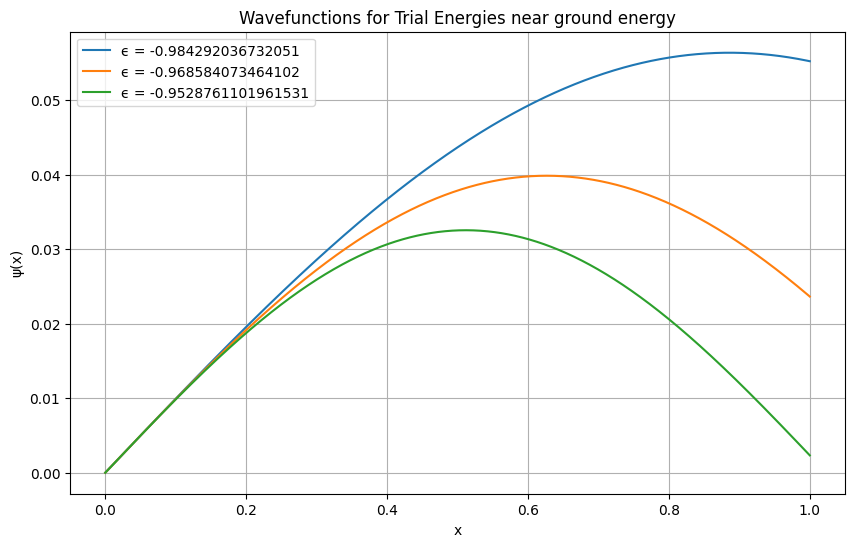

In [65]:


# Trial energies
trial_energies = [(np.pi * n / gamma_squared) - 1 for n in range(1, 4)]

# Solve and plot wavefunctions for trial energies
plt.figure(figsize=(10, 6))
for energy in trial_energies:
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    plt.plot(x, psi, label=f"ϵ = {energy}")

plt.title("Wavefunctions for Trial Energies near ground energy")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()

### Task 3

Next we will implement the numerical method to find the energies and
eigenstates of the infinite square well (for γ2 = 200 as before). While
the ψ you computed in task 2 satisfies the Schr¨odinger equation, it only
satisfies the boundary conditions for certain values of the energy ϵ. To
find them, you should implement the following algorithm to find the value
of ϵ which solves ψ[N−1] = 0. This is a form of the bisection algorithm
for finding roots of a function. Before you code it, try to sketch out how
it works using a pencil and paper.
Start with a trial energy ϵ below the eigenstate, and define an increment
∆ϵ. ∆ϵ should start at some value smaller than the difference between
adjacent energy eigenvalues, but don’t make it too small. Compute the
wavefunction ψ for energy ϵ. Then add ∆ϵ to this energy and compute
the wavefunction again. Test if the sign of ψ[N−1] is different in those
two cases, and if it is, update the energy increment ∆ϵ =−∆ϵ/2. Keep
doing this in a while loop, where the variable ϵ updates each time, until
|∆ϵ|< acc, where acc is a variable that defines the accuracy with which
the root is sought.

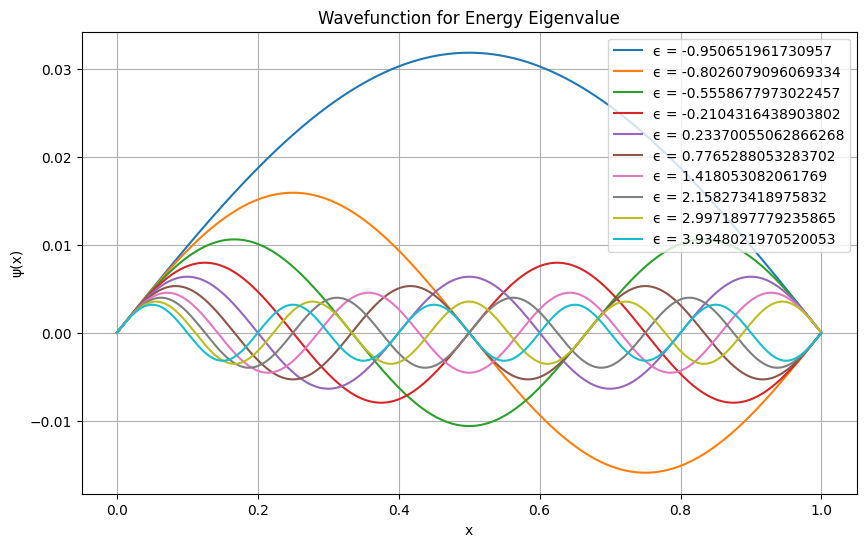

In [66]:
acc = 1e-8 # Desired accuracy for energy eigenvalues

# Solve and plot wavefunctions for the eigenvalue
plt.figure(figsize=(10, 6))

eps_0 = -0.999999

eps_arr = []

energy  = eps_0



while len(eps_arr) < 10:
    del_eps = 0.02
    psi_old = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]
    energy += del_eps
    while abs(del_eps)>acc:
        energy += del_eps
        psi_new = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]

        if psi_new * psi_old < 0:
            del_eps = -del_eps/2

        psi_old = psi_new

    
    
    eps_arr.append(energy)


# Plot the wavefunction
for energy in eps_arr:
    psi = solve_schrodinger(energy, potential, gamma_squared, N, l)
    plt.plot(x, psi, label=f"ϵ = {energy}")
plt.title("Wavefunction for Energy Eigenvalue")
plt.xlabel("x")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()

### Task 4
Use this method to compute the first 10 energy eigenvalues and compare
with the analytic solution from task 1.

| $n$ | Energy $\epsilon_n$ | Wave Function |
|-----|---------------------|---------------|
| 1 | $\frac{\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(\pi\tilde{x})$ |
| 2 | $\frac{4\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(2\pi\tilde{x})$ |
| 3 | $\frac{9\pi^2}{\gamma^2} - 1$ | $\sqrt{2} \sin(3\pi\tilde{x})$ |

In [67]:
Analytical_epsilons = [(np.pi)**2 * n**2 / gamma_squared - 1 for n in range(1, 11)]

print("Computed energy eigenvalues:")
for i, energy in enumerate(eps_arr):
    print(f"n={i+1}: Computed ϵ = {energy:.3e}, Theoretical ϵ = {Analytical_epsilons[i]:.3e}, Error = {abs(energy - Analytical_epsilons[i]):.3e}")

Computed energy eigenvalues:
n=1: Computed ϵ = -9.507e-01, Theoretical ϵ = -9.507e-01, Error = 1.626e-08
n=2: Computed ϵ = -8.026e-01, Theoretical ϵ = -8.026e-01, Error = 2.371e-09
n=3: Computed ϵ = -5.559e-01, Theoretical ϵ = -5.559e-01, Error = 4.649e-09
n=4: Computed ϵ = -2.104e-01, Theoretical ϵ = -2.104e-01, Error = 4.022e-09
n=5: Computed ϵ = 2.337e-01, Theoretical ϵ = 2.337e-01, Error = 4.925e-10
n=6: Computed ϵ = 7.765e-01, Theoretical ϵ = 7.765e-01, Error = 1.313e-08
n=7: Computed ϵ = 1.418e+00, Theoretical ϵ = 1.418e+00, Error = 3.795e-09
n=8: Computed ϵ = 2.158e+00, Theoretical ϵ = 2.158e+00, Error = 1.063e-08
n=9: Computed ϵ = 2.997e+00, Theoretical ϵ = 2.997e+00, Error = 4.518e-09
n=10: Computed ϵ = 3.935e+00, Theoretical ϵ = 3.935e+00, Error = 3.493e-09


### Task 5

You should now investigate the accuracy of the energy eigenvalues. How
accurate are they? Do they get more and more accurate as the variable
acc is made smaller? Explore this as you would in an experiment, and if
you find that they do not, consider why that might be.

In [68]:
acc = 1e-8 # Desired accuracy for energy eigenvalues
eps_0 = -0.999999

def find_energy_eigenvalues(eps_0, potential, gamma_squared, N, l, acc, del_eps):
    eps_arr = []
    energy  = eps_0

    while len(eps_arr) < 10:
        del_eps = 0.02
        psi_old = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]
        energy += del_eps
        while abs(del_eps)>acc:
            energy += del_eps
            psi_new = solve_schrodinger(energy, potential, gamma_squared, N, l)[-1]

            if psi_new * psi_old < 0:
                del_eps = -del_eps/2

            psi_old = psi_new

        
        
        eps_arr.append(energy)

    return eps_arr

In [69]:

def error_analysis_with_accuracy_tol(acc):
    error_in_eigenvalues = np.array([])
    Analytical_epsilons = np.array([(np.pi)**2 * n**2 / gamma_squared - 1 for n in range(1, 11)])
    computed_epsilons = np.array(find_energy_eigenvalues(eps_0, potential, gamma_squared, N, l, acc, del_eps=0.02))

    error_in_eigenvalues = np.abs(computed_epsilons - Analytical_epsilons)
    avrg_error = np.mean(error_in_eigenvalues)
    avrg_error_variance = np.var(error_in_eigenvalues)

    return avrg_error, avrg_error_variance


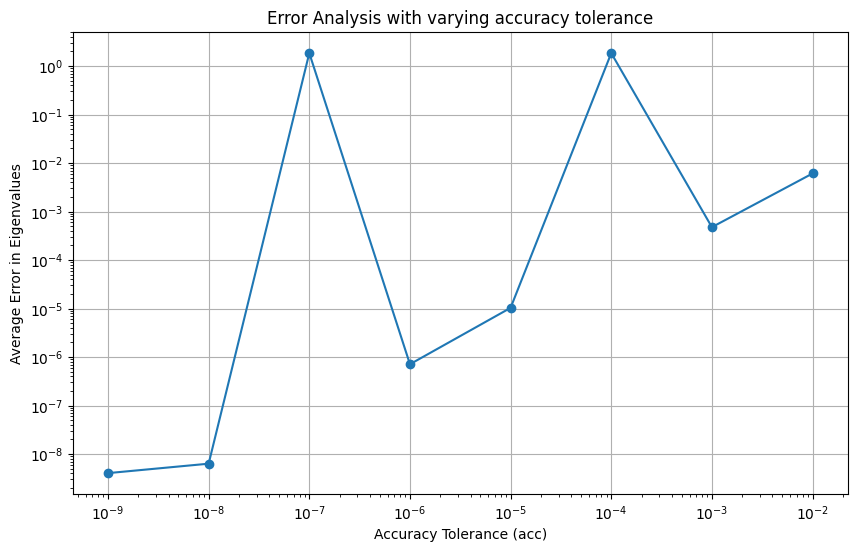

In [73]:
plt.figure(figsize=(10, 6))
plt.title("Error Analysis with varying accuracy tolerance")
plt.xlabel("Accuracy Tolerance (acc)")
plt.ylabel("Average Error in Eigenvalues")
acc_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]
avg_errors = []

for acc in acc_values:
    avg_error, _ = error_analysis_with_accuracy_tol(acc)
    avg_errors.append(avg_error)
plt.loglog(acc_values, avg_errors, marker='o')
plt.grid()
plt.show()
